In [77]:
# importing packages
import numpy as np
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
import pandas as pd

Relationship Between Equivalent Conductivity and Specific Conductivity

Specific conductivity = equivalent conductivity*concentration/1000

Where the concentration is in equivalent per litre and equivalent conductivity in centimeter squared per Ohm per equivalent

In [78]:
# loading NaCl equivalent conductivity data
equiv_data = pd.read_csv("NaCl_equiv.csv")
molar_conc_equiv = equiv_data["Conc_mM"]
equiv_cond = equiv_data["Equiv_cond(cm2/Ohm/equiv)"]

# number of data points
ndata = len(equiv_cond)

# converting the concentrations in mM to equivalent per litre
equiv_conc = [molar_conc_equiv[i]*10**(-3) for i in range(ndata)]

# specific conductivity in Siemen per cm
specific_cond = [equiv_cond[i]*equiv_conc[i]/1000 for i in range(ndata)]

# specific conductivity in micro Siemen per cm
specific_cond_calc = [specific_cond[i]*10**6 for i in range(ndata)]

# creating dataframe
input_output = [molar_conc_equiv, specific_cond_calc]
conc_cond = np.transpose(input_output)
column_names = ["Conc (mM)", "Calc cond (uS/cm)"]
specific_cond_calc_data = pd.DataFrame(conc_cond, columns=column_names)

print(specific_cond_calc_data)

   Conc (mM)  Calc cond (uS/cm)
0        0.0              0.000
1        0.5             62.255
2        1.0            123.750
3        2.0            245.360
4        5.0            603.400
5       10.0           1185.700
6       20.0           2316.200
7       50.0           5551.500
8      100.0          10652.000


In [79]:
# loading NaCl specific conductivity data
specific_data = pd.read_csv("NaCl.csv")
molar_conc_specific = specific_data["NaCl conc"]
specific_cond_exp = specific_data["NaCl cond"]

# number of data points
ndata2 = len(specific_cond_exp)

Comparison between calculated specific conductivity and experiment 

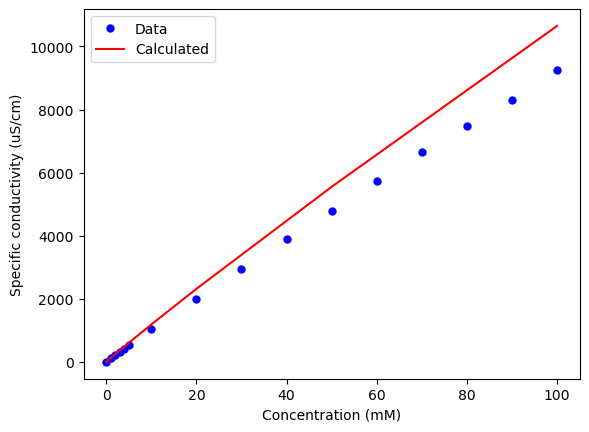

In [80]:
# making plots comparison of data and prediction
plt.plot(molar_conc_specific, specific_cond_exp, "b.", markersize=10, label="Data")
plt.plot(molar_conc_equiv, specific_cond_calc, "r-", label="Calculated")
plt.xlabel("Concentration (mM)")
plt.ylabel("Specific conductivity (uS/cm)")
plt.legend()
plt.show()

Residuals

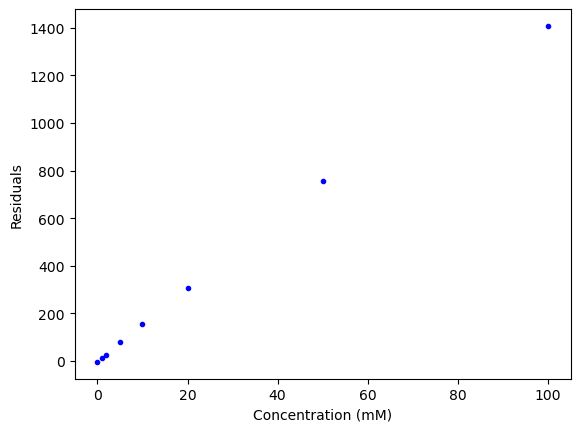

In [82]:
# initial residual list
residuals = []

# converting molar concentration data to list
molar_conc_equiv2 = list(molar_conc_equiv)
molar_conc_specific2 = list(molar_conc_specific)

# looping through molar concentrations of equivalent data and specific data and taking the residuals of same molar concentrations
for conc in molar_conc_equiv2:
    for conc2 in molar_conc_specific2:
        if conc == conc2:
            index_conc = molar_conc_equiv2.index(conc)
            index_conc2 = molar_conc_specific2.index(conc2)
            residual = specific_cond_calc[index_conc] - specific_cond_exp[index_conc2]
            residuals.append(residual)
        else:
            pass

# removing molar concentration of equivalent data without a residual
molar_conc_equiv2.pop(1)

# making plot of residuals of calculated specific conductivity
plt.plot(molar_conc_equiv2, residuals, "b.")
plt.xlabel("Concentration (mM)")
plt.ylabel("Residuals")
plt.show()